# QUBO Linear Solver for Newton-Raphson 
As explained in the previous notebook, the Newton Raphson approach relies on the solution of a linear system. Several quantum linear solvers have been developped, one of them being the QUBO linear solver. This solver recast the residue of the linear system as a QUBO problem and seek an optimal solution of this problem, leading to an approximation of the linear system of equation.

## Example 
To make things clearer let's consider the following example:

$$
f_1(x,y,z) = 2x^3 - x y+ 4z -12 \\
f_2(x,y,z) = -4x + z^5 + 8 z y \\
f_3(x,y,z) = 3x^3 +z^5 + 8 z y
$$

That we define in the following function

In [1]:
import numpy as np


def func(input):
    def f1(x, y, z):
        return 2 * x**3 - x * y + 4 * z - 12

    def f2(x, y, z):
        return -4 * x + z**5 + 8 * z * y

    def f3(x, y, z):
        return 3 * x**3 + z**5 + 8 * z * y

    x, y, z = input
    return np.array([f(x, y, z) for f in [f1, f2, f3]])

# Using QUBOLS to solve the linear system

The `QuantumNewtonRaphson` can use our `qubols` solver to solve the linear system of equations at the hart of the newton raphson routine.  

In [2]:
from quantum_newton_raphson.newton_raphson import newton_raphson
from quantum_newton_raphson.qubo_solver import QUBO_SOLVER

# define the linear solver with the reorder solver
solver = QUBO_SOLVER(num_reads=100, num_qbits=11)

# Solve the newton raphson problem
res = newton_raphson(func, np.random.rand(3), linear_solver=solver)

/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


Warning, we didn't reach the required tolerance within 100 iterations, error is at 0.003676291208234872


We can check the solution against the solution obatined via a classical newton raphson 

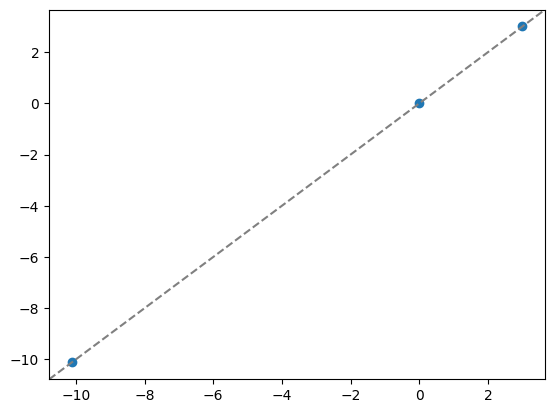

In [3]:
import matplotlib.pyplot as plt

res_ref = newton_raphson(func, np.random.rand(3))
plt.scatter(res_ref.solution, res.solution)
_ = plt.axline((0, 0), slope=1, linestyle="--", color="grey")